In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl # optional (here)
import matplotlib.pyplot as plt
from ipywidgets import widgets,  interactive, interact



# Descripción
En este Jupyter notebook se ha realizado la ingesta de datos de generación de energía de diferentes fuentes desde REE y se han habilitado diferentes controles para realizar análisis exploratorio de la información de manera sencilla.
Además se ha instalado VOILA que permite compartir posteriormente esta información como una web interactiva con diferentes agentes

In [2]:
#Ingesta de información en csv
energia=pd.read_csv('DATOS/energy_dataset.csv', parse_dates=['time'])
meteo=pd.read_csv('DATOS/weather_features.csv',parse_dates=['dt_iso'])

In [3]:
#obviamos las variables que no tienen valores
energia.drop(['generation fossil coal-derived gas','generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation marine','generation wind offshore','forecast wind offshore eday ahead','generation hydro pumped storage aggregated'],axis=1,inplace=True)

In [4]:
#seleccion de variables representables
Lista_ENE=energia.columns.values
Lista_meteo=meteo.columns.values


In [5]:
desp_ener=widgets.Dropdown(options=Lista_ENE[1:22], value=Lista_ENE[1], description='Energia')
desp_meteo=widgets.Dropdown(options=Lista_meteo[2:16], value=Lista_meteo[2], description='Meteo')
ciudades=meteo.city_name.unique()
desp_ciudad=widgets.Dropdown(options=ciudades, value=ciudades[0], description='Ciudad' )

In [6]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
def ENER_Plot(vble_ENER):
    fig1=plt.figure(figsize=(15,7))
    x=energia.time
    y=energia[vble_ENER]
    plt.plot(x,y) 
    plt.xticks(rotation='vertical')
    plt.show()
    
def Meteo_plot(vble_METEO, vble_ciudad):
    fig2=plt.figure(figsize=(15,7))
    df=meteo[meteo.city_name==vble_ciudad]
    x1=df.dt_iso
    y1=df[vble_METEO]
    plt.plot(x1,y1)
    plt.xticks(rotation='vertical')
    plt.show()

# Visualización de variables 
La siguiente grafica permite de manera interactiva analizar de un vistazo el comportamiento temporal de las distintas series de datos disponibles
Simplemente se selecciona en el desplegable la variable y automaticamente se actualiza el gráfico

In [7]:
interactive(ENER_Plot, vble_ENER=desp_ener)


interactive(children=(Dropdown(description='Energia', options=('generation biomass', 'generation fossil brown …

# Representación de variables meteorologicas
En la siguiente gráfica se muestra como se puede además filtrar por un determinado parámetro de manera sencilla. En este caso tenemos un archivo con datos meteorologicos de diferentes ciudades, y se filtra para representar cualquiera de las variables para cualquiera de las ciudades

In [8]:
interactive(Meteo_plot, vble_METEO=desp_meteo,vble_ciudad=desp_ciudad )


interactive(children=(Dropdown(description='Meteo', options=('temp', 'temp_min', 'temp_max', 'pressure', 'humi…

# Correlación entre variables
A continuación se representa un mapa de calor con la correlación entre las diferentes variables


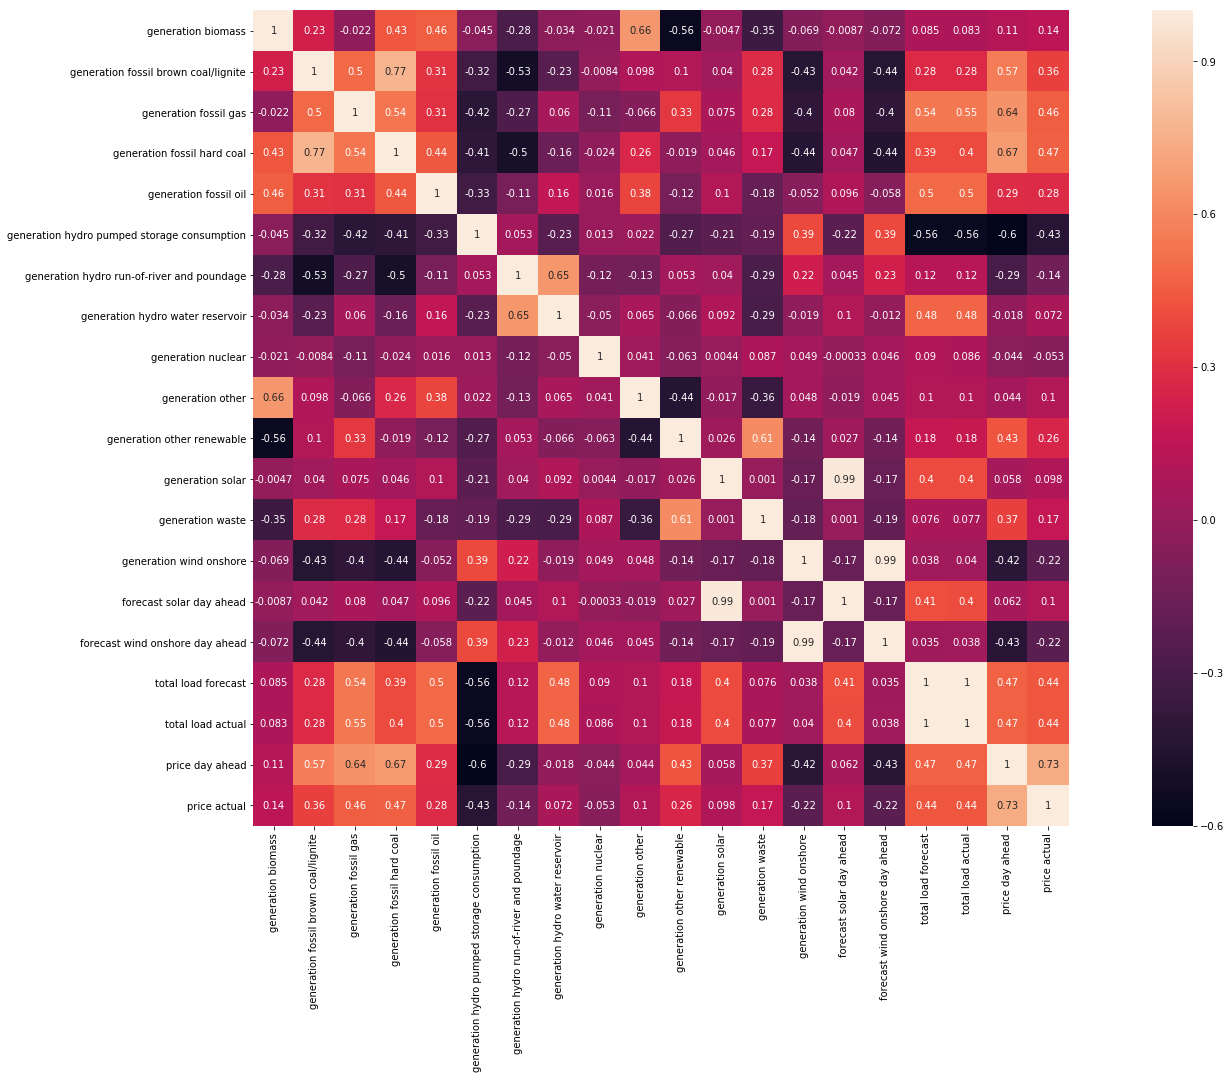

In [9]:
import seaborn as sns
plt.figure(figsize=(30,15))
sns.heatmap(energia.corr(), square=True, annot=True)

Para analizar con más detenimiento la correlación entre 2 variables, se genera una función que permite representar con un scatter plot la relación entre 2 variables cualesquiera disponibles

In [10]:
V1=widgets.Dropdown(options=Lista_ENE[1:22], value=Lista_ENE[1], description='Energia1')
V2=widgets.Dropdown(options=Lista_ENE[1:22], value=Lista_ENE[1], description='Energia2')


In [11]:
def Correlar0(V_ener1,V_ener2):
    fig=plt.figure(figsize=(15,7))
    df=energia.copy()    
    x1=df[V_ener1]
    x2=df[V_ener2]
    plt.scatter(x1,x2)
    plt.show()    


In [12]:
interactive(Correlar0, V_ener1=V1, V_ener2=V2)

interactive(children=(Dropdown(description='Energia1', options=('generation biomass', 'generation fossil brown…

Se genera también una interfaz para correlar las diferentes energías con las características meteorologicas que provienen de una fuente de datos diferente

In [13]:
desp_ener1=widgets.Dropdown(options=Lista_ENE[1:22], value=Lista_ENE[1], description='Energia')
desp_meteo1=widgets.Dropdown(options=Lista_meteo[2:16], value=Lista_meteo[2], description='Meteo')
ciudades=meteo.city_name.unique()
desp_ciudad1=widgets.Dropdown(options=ciudades, value=ciudades[0], description='Ciudad' )

In [14]:
def Correlar(V_meteo,V_ener,ciudad):
    
    fig3=plt.figure(figsize=(15,7))
    df1=meteo[meteo.city_name==ciudad].copy()   
    df2=energia.copy()    
    dfT = df1.merge(df2, left_on="dt_iso", right_on="time",how='left')
    x2=dfT[V_meteo]
    x1=dfT[V_ener]
    plt.scatter(x1,x2)
    plt.show()    


In [15]:
interactive(Correlar, V_meteo=desp_meteo1, V_ener=desp_ener1, ciudad=desp_ciudad1)

interactive(children=(Dropdown(description='Meteo', options=('temp', 'temp_min', 'temp_max', 'pressure', 'humi…

Por último se prepara una funcion que permite correlar cualquier variable del archivo de energía con la variable PRECIO REAL

In [16]:
desp_ener2=widgets.Dropdown(options=Lista_ENE[1:22], value=Lista_ENE[1], description='Energia')

In [17]:
def Correlar_Precio(V_ener):
    
    fig4=plt.figure(figsize=(15,7))
    df3=energia.copy()    
    precio=df3['price actual']
    y=df3[V_ener]
    plt.scatter(precio,y)
    plt.show()    


In [18]:

interactive(Correlar_Precio,V_ener=desp_ener2)

interactive(children=(Dropdown(description='Energia', options=('generation biomass', 'generation fossil brown …